# Question 
## Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel

In [2]:
data=pd.read_csv("D:\\Data Science\\Assignment 10\\Raw Material\\book.csv",encoding= 'unicode_escape')

In [3]:
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
data.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [5]:
data['User.ID'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [6]:
data['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [7]:
data['Book.Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [8]:
tfidf = TfidfVectorizer(stop_words="english") 

In [9]:
data["Book.Title"].isnull().sum() 

0

In [10]:
data["Book.Rating"].isnull().sum() 

0

In [11]:
tfidf_matrix = tfidf.fit_transform(data['Book.Title']) 

In [12]:
tfidf_matrix.shape

(10000, 11435)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


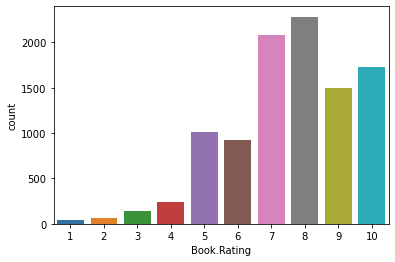

In [13]:
sns.countplot(data['Book.Rating'])
plt.show()

In [14]:
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

In [15]:
book_index = pd.Series(data.index,index=data['Book.Title']).drop_duplicates()

In [16]:
book_index['Decision in Normandy']

2

In [17]:
book_index['The Mummies of Urumchi']

4

In [18]:
def get_book_recommendations(Name,topN): #topN = 10
    # Getting the book index using its title 
    book_id = book_index[Name]
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[book_id]))
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    # Get the scores of top 10 most similar book's 
    cosine_scores_10 = cosine_scores[0:topN+1]
    # Getting the book index 
    book_idx  =  [i[0] for i in cosine_scores_10]
    book_scores =  [i[1] for i in cosine_scores_10]
    # Similar movies and scores
    book_similar_show = pd.DataFrame(columns=["Book.Title","Book.Rating"])
    book_similar_show["Book.Title"] = data.loc[book_idx,"Book.Title"]
    book_similar_show["Book.Rating"] = book_scores
    book_similar_show.reset_index(inplace=True)  
    book_similar_show.drop(["index"],axis=1,inplace=True)
    print (book_similar_show)
    #return (anime_similar_show)

In [19]:
get_book_recommendations("Twilight",topN=10)

                                           Book.Title  Book.Rating
0                                            Twilight     1.000000
1                                    Edge of Twilight     0.743196
2                                Embrace the Twilight     0.677633
3   Dragons of Autumn Twilight (Dragonlance Chroni...     0.414123
4   Twilight (Star Trek Deep Space Nine: Mission G...     0.408478
5   Twilight over Burma: My Life As a Shan Princes...     0.379453
6   Moreau Omnibus: Forests of the Night/Emperors ...     0.341455
7                                 Classical Mythology     0.000000
8                                        Clara Callan     0.000000
9                                Decision in Normandy     0.000000
10  Flu: The Story of the Great Influenza Pandemic...     0.000000
